## Keras MNIST MLP 示例

In [3]:
from __future__ import print_function

import numpy as np

import os

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data(os.getcwd() + '/mnist.npz')

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trai

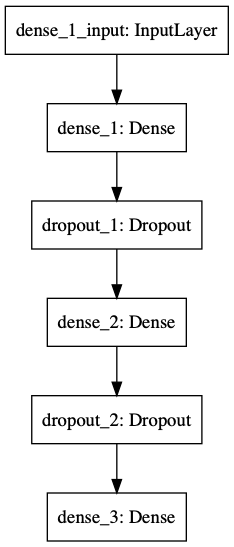

In [4]:
keras.utils.plot_model(model, to_file='mnist.png')

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2548 - acc: 0.9200 - val_loss: 0.1060 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1052 - acc: 0.9678 - val_loss: 0.0904 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0792 - acc: 0.9761 - val_loss: 0.0851 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0631 - acc: 0.9810 - val_loss: 0.0713 - val_acc: 0.9808
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0518 - acc: 0.9842 - val_loss: 0.0701 - val_acc: 0.9815
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0462 - acc: 0.9871 - val_loss: 0.0690 - val_acc: 0.9832
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0

In [6]:
model.save('mnist.h5')